In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import linear_model
import statsmodels.api as sm

In [2]:
#  data files
aus_birth_df = "Resources/australia_births.csv"
aus_birth_1000_df = "Resources/australia_births_per_1000.csv"
aus_CPI_df = "Resources/australia_CPI.csv"
aus_week_wages = "Resources/weekly_wages.csv"
aus_population= "Resources/australia_population.csv"


# Read the data
aus_birth_df =  pd.read_csv(aus_birth_df)
aus_birth_1000_df = pd.read_csv(aus_birth_1000_df)
aus_CPI_df=pd.read_csv(aus_CPI_df)
aus_wages_df=pd.read_csv(aus_week_wages)
aus_population_df=pd.read_csv(aus_population)



In [3]:
#routine to run a linear regression
def do_linear_regression_plot(x_axis, y_axis, plot_color):
    (slope, intercept, r_value, p_value, stderr) = linregress(x_axis, y_axis)
    reg_line = x_axis * slope + intercept
    plt.scatter(x_axis, y_axis, color=plot_color)
    plt.plot(x_axis, reg_line, plot_color)

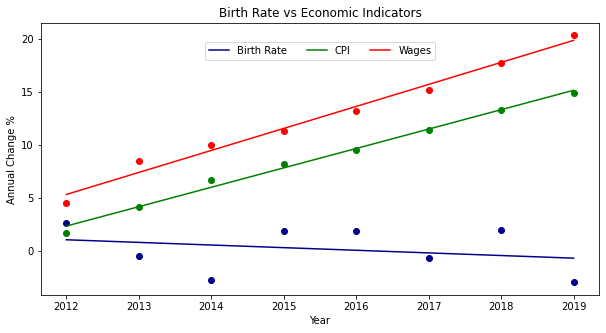

In [5]:
plt.figure(figsize=(10,5))
do_linear_regression_plot(aus_birth_df["Year"],
                          aus_birth_df["Annual Change"],
                          "darkblue")

do_linear_regression_plot(aus_CPI_df["Year"],
                          aus_CPI_df["Annual Change"],
                          "green")
do_linear_regression_plot(aus_wages_df["Year"],
                          aus_wages_df["Annual Change"],
                          "red")
plt.ylabel("Annual Change %")    
plt.title("Birth Rate vs Economic Indicators")
plt.xlabel("Year")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=5, labels=['Birth Rate', 'CPI','Wages'])
plt.savefig('saved_figure.png')
plt.show()

In [ ]:
plt.clf()
plt.figure(figsize=(10,5))

do_linear_regression_plot(aus_population_df["Year"],
                          aus_population_df["Births"]/100,
                          "olive")

do_linear_regression_plot(aus_population_df["Year"],
                          aus_population_df["Population"]/1000,
                          "blue")

axes = plt.gca()
axes.set_ylim([0,30000])

plt.ylabel("Count")    
plt.title("Australia Birth Rate vs Population")
plt.xlabel("Year")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.6), ncol=5, labels=['Births (00s)', 'Population (000s)'])
plt.savefig('saved_figure.png')
plt.show()
